In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv('../../Python ML/Data_Science_Python_Regression/Course Materials/Data/powerconsumption.csv')

In [60]:
df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [61]:
len(df)

52416

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle

In [63]:
MODEL_NAME = 'power_consumption_1.pkl'

In [64]:
future_data = df[-25000:]

In [65]:
present_data = df.head(len(df)-25000)

C:\Users\ArnabBiswas\anaconda3\envs\mlenv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


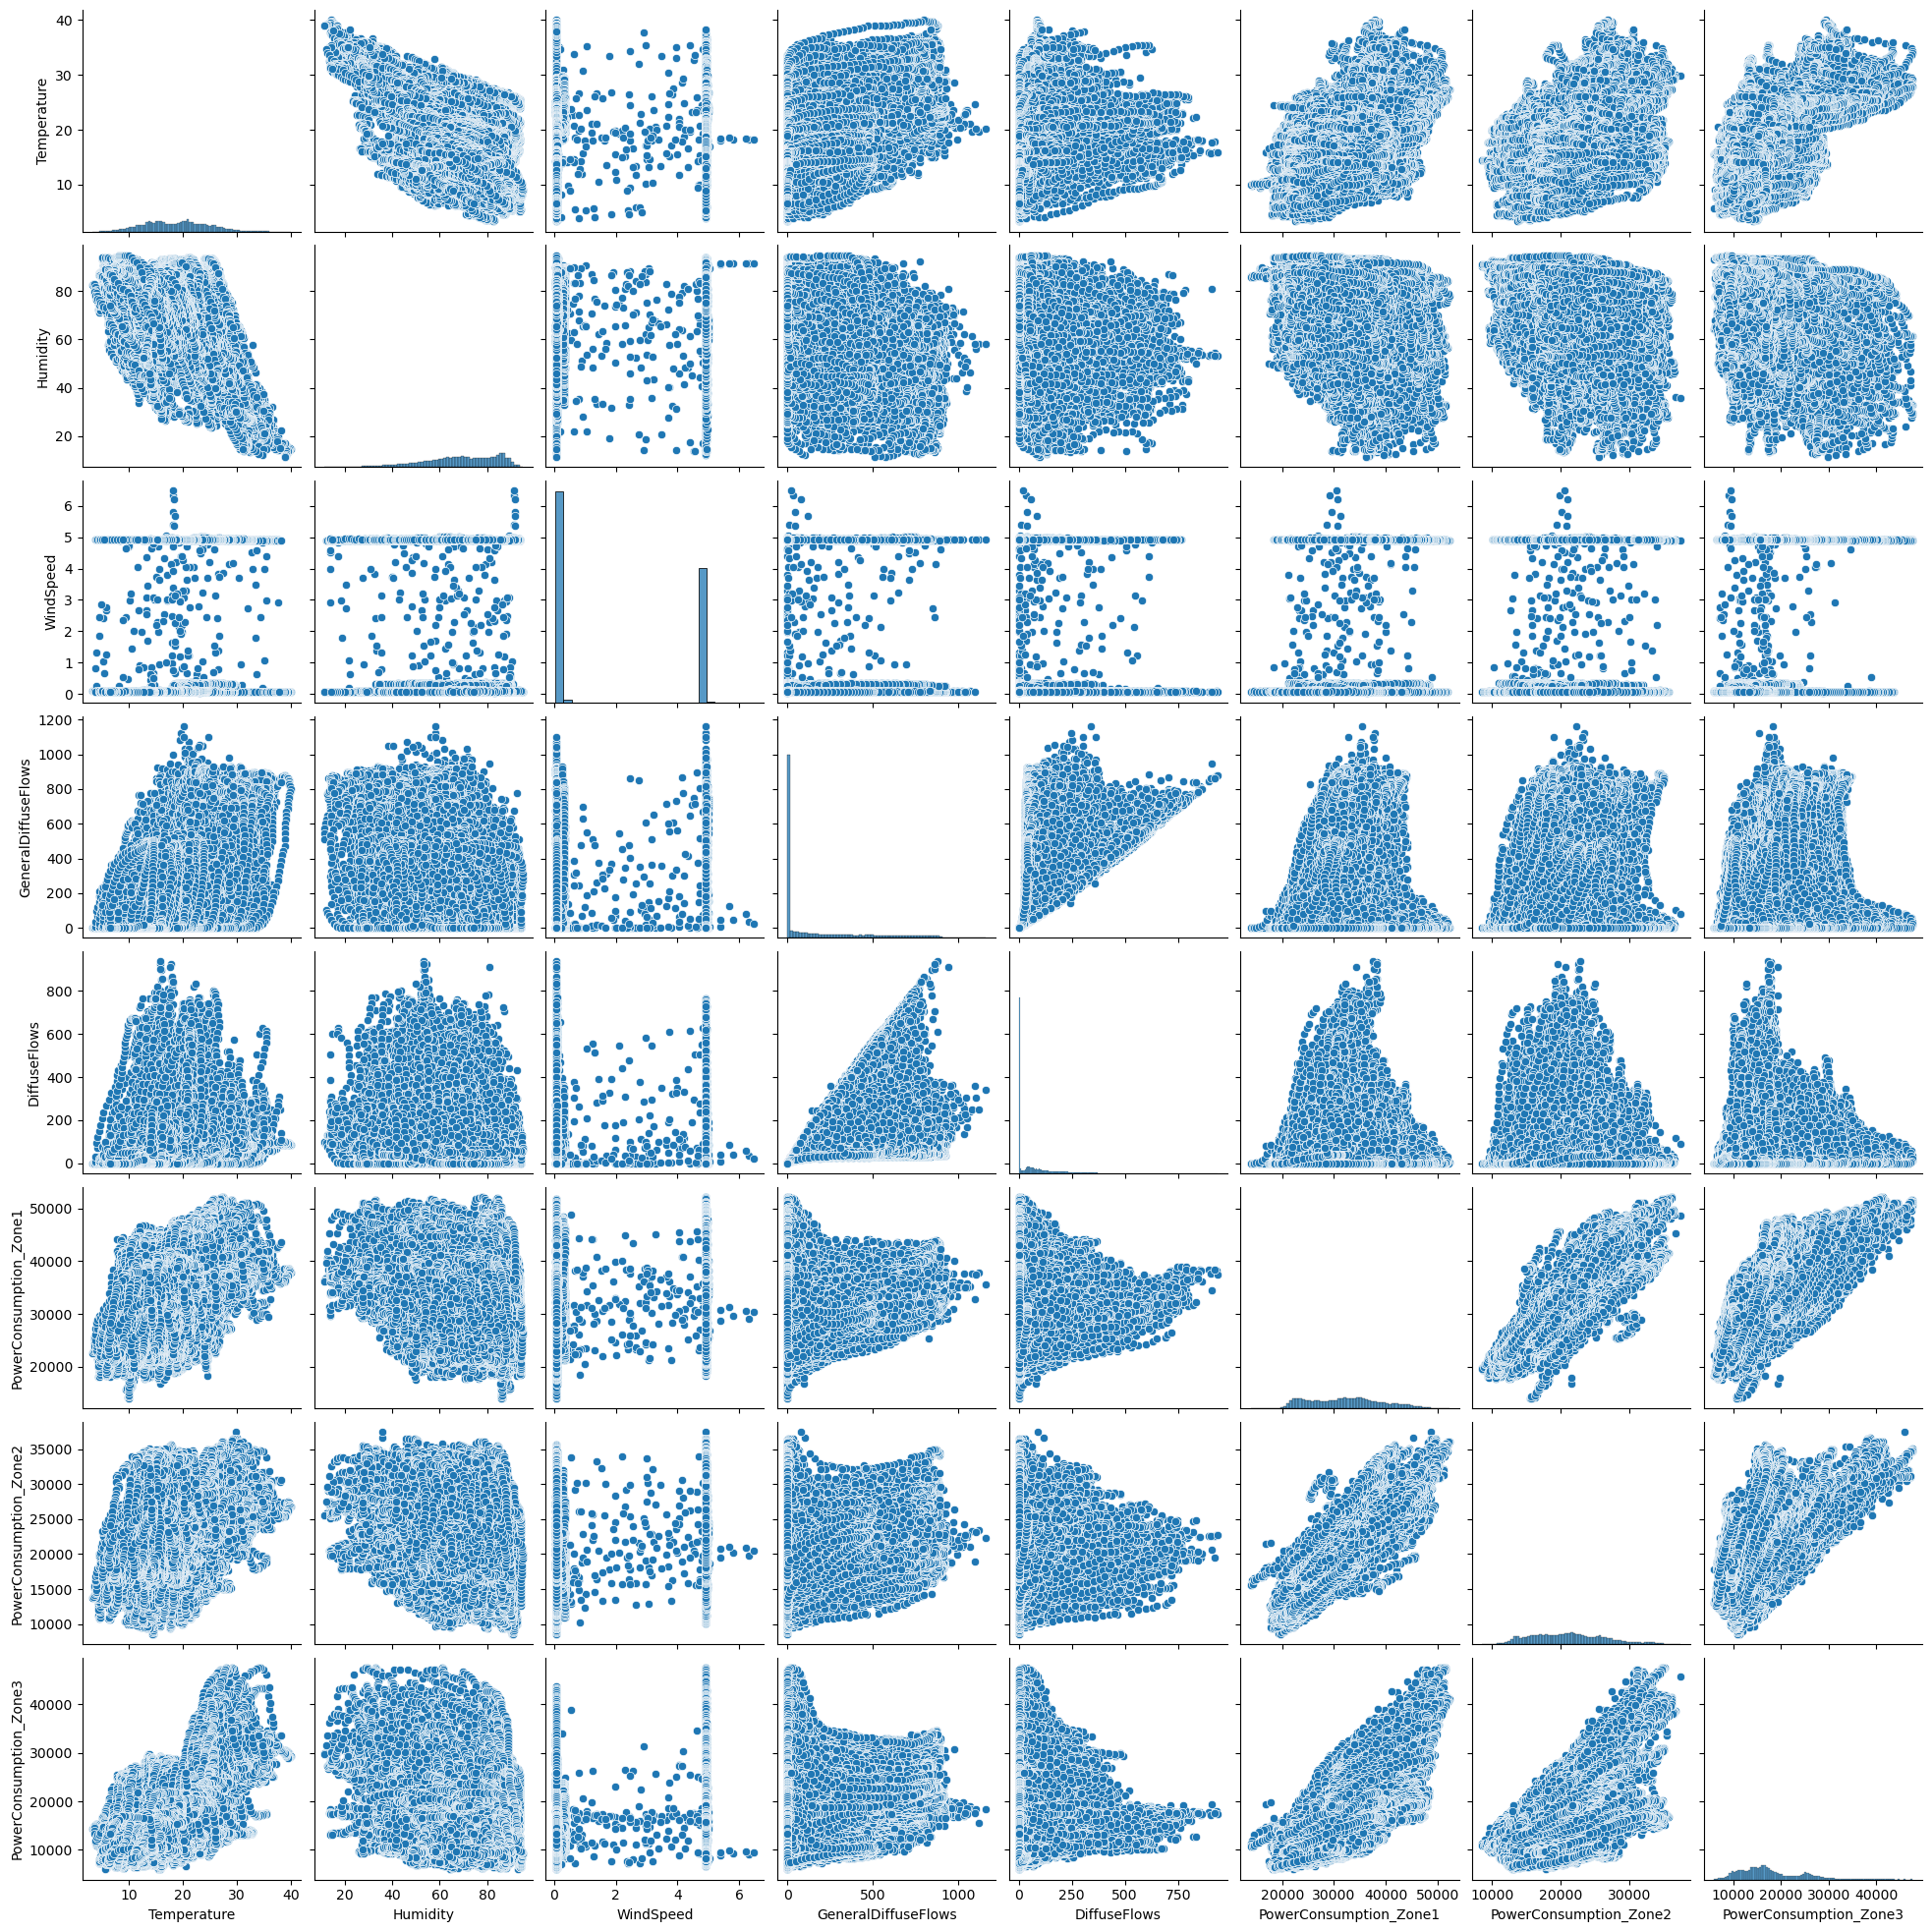

In [66]:
sns.pairplot(df.drop('Datetime', axis=1))

In [67]:
X = present_data.drop(['PowerConsumption_Zone3','Datetime'], axis=1)
y = present_data['PowerConsumption_Zone3']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [69]:
lr  = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [70]:
# save
with open(MODEL_NAME,'wb') as f:
    pickle.dump(lr,f)

In [71]:
pred_y = lr.predict(X_test)

In [72]:
from sklearn.metrics import median_absolute_error, mean_squared_error, r2_score

In [73]:
print(median_absolute_error(pred_y,y_test))
print(mean_squared_error(pred_y,y_test, squared=False))
print(r2_score(pred_y,y_test))

1413.958502170155
2046.7106531474997
0.8009751801312113


In [74]:
model = None
with open(MODEL_NAME, 'rb') as fp:
    model = pickle.load(fp)

In [75]:
model.coef_

array([ 2.06335914e+02,  5.35154464e+00,  1.28443192e+02, -4.23496353e+00,
       -4.64539849e+00,  4.93704309e-01,  1.64543597e-01])

In [76]:
model.intercept_

-3300.479639315552

In [77]:
# Retraining and cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=101)

In [82]:
l = []
for train_ind, val_ind in kf.split(future_x, future_y):
    X_train, y_train = future_x.iloc[train_ind], future_y.iloc[train_ind]
    X_val, y_val = future_x.iloc[val_ind], future_y.iloc[val_ind]
    model.fit(X_train,y_train)
    pred_y = model.predict(X_val)
    tmp = (median_absolute_error(pred_y,y_val), mean_squared_error(pred_y,y_val, squared=False),r2_score(pred_y,y_val))
    l.append(tmp)

In [83]:
for i in l:
    print(i)

(2942.108722538378, 4200.744723085412, 0.6086930658559824)
(2907.6542250902526, 4186.387637989604, 0.6114737518366384)
(2893.7486430741947, 4189.482280173064, 0.6154202416577972)
(2830.175774793166, 4185.924213180367, 0.6257456932765353)
(2865.923151926303, 4235.435542371934, 0.6092948881834641)


In [87]:
model = LinearRegression()
X= df.drop(['PowerConsumption_Zone3','Datetime'], axis=1)
y = df['PowerConsumption_Zone3']

l = []
for train_ind, val_ind in kf.split(X, y):
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]
    model.fit(X_train,y_train)
    pred_y = model.predict(X_val)
    tmp = (median_absolute_error(pred_y,y_val), mean_squared_error(pred_y,y_val, squared=False),r2_score(pred_y,y_val))
    l.append(tmp)
    
for i in l:
    print(i)

(2416.190681158003, 3905.4072806816034, 0.45501186932017523)
(2486.674579118837, 3932.811963334069, 0.4560451878500149)
(2468.312651008904, 3967.9230228068673, 0.44540875601254115)
(2500.651527183636, 3977.070973498211, 0.4377507432547947)
(2505.64920479813, 3999.7028919088257, 0.42990269894335953)
